In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('pima_indians_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].to_numpy()
y = df['Outcome'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(8,)))
model.add(layers.Dense(64, activation='relu'))

# The last layer uses a softmax activation. 
# It means the network will output a probability distribution over the 46
# different output classes—for every input sample, the network will produce a 46-
# dimensional output vector, where output[i] is the probability that the sample
# belongs to class i. The 46 scores will sum to 1.
model.add(layers.Dense(46, activation='softmax'))

2022-11-30 13:32:08.524676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 13:32:12.158812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [11]:
partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [12]:
partial_x_train.shape

(491, 8)

In [13]:
x_val.shape

(123, 8)

In [14]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=50,
batch_size=256,
validation_data=(x_val, y_val))

Epoch 1/50
2/2 [==============================] - 0s 145ms/step - loss: 21.3891 - accuracy: 0.0000e+00 - val_loss: 8.9981 - val_accuracy: 0.0407
Epoch 2/50
2/2 [==============================] - 0s 22ms/step - loss: 7.3245 - accuracy: 0.0774 - val_loss: 1.9381 - val_accuracy: 0.5285
Epoch 3/50
2/2 [==============================] - 0s 21ms/step - loss: 2.0051 - accuracy: 0.5071 - val_loss: 1.2116 - val_accuracy: 0.6341
Epoch 4/50
2/2 [==============================] - 0s 22ms/step - loss: 1.5035 - accuracy: 0.5458 - val_loss: 1.5094 - val_accuracy: 0.6585
Epoch 5/50
2/2 [==============================] - 0s 21ms/step - loss: 1.4358 - accuracy: 0.5825 - val_loss: 1.0960 - val_accuracy: 0.6667
Epoch 6/50
2/2 [==============================] - 0s 21ms/step - loss: 1.1190 - accuracy: 0.5967 - val_loss: 1.2697 - val_accuracy: 0.6585
Epoch 7/50
2/2 [==============================] - 0s 23ms/step - loss: 1.1463 - accuracy: 0.6314 - val_loss: 1.1289 - val_accuracy: 0.6341
Epoch 8/50
2/2 [=====

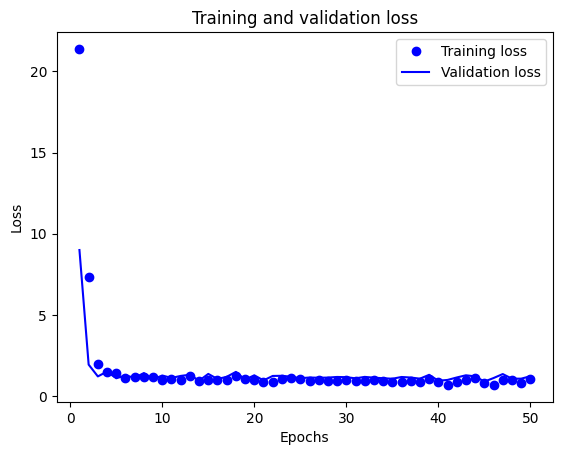

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

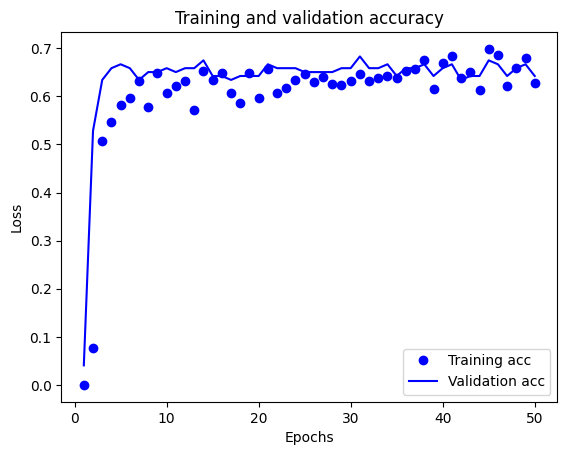

In [16]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(8,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/9
1/1 [==============================] - 0s 418ms/step - loss: 31.6732 - accuracy: 0.0000e+00 - val_loss: 16.8813 - val_accuracy: 0.0244
Epoch 2/9
1/1 [==============================] - 0s 23ms/step - loss: 17.0492 - accuracy: 0.0122 - val_loss: 9.8978 - val_accuracy: 0.1057
Epoch 3/9
1/1 [==============================] - 0s 23ms/step - loss: 9.9221 - accuracy: 0.1018 - val_loss: 6.0460 - val_accuracy: 0.3171
Epoch 4/9
1/1 [==============================] - 0s 23ms/step - loss: 6.0851 - accuracy: 0.3299 - val_loss: 3.9071 - val_accuracy: 0.3902
Epoch 5/9
1/1 [==============================] - 0s 23ms/step - loss: 3.7976 - accuracy: 0.4277 - val_loss: 2.6712 - val_accuracy: 0.4390
Epoch 6/9
1/1 [==============================] - 0s 24ms/step - loss: 2.5578 - accuracy: 0.4807 - val_loss: 2.4614 - val_accuracy: 0.4797
Epoch 7/9
1/1 [==============================] - 0s 23ms/step - loss: 2.5333 - accuracy: 0.5173 - val_loss: 3.0779 - val_accuracy: 0.5854
Epoch 8/9
1/1 [===========

In [18]:
predictions = model.predict(x_test)

5/5 [==============================] - 0s 985us/step


In [19]:
x_test[3]

array([  8.   , 107.   ,  80.   ,   0.   ,   0.   ,  24.6  ,   0.856,
        34.   ])

In [20]:
np.argmax(predictions[3])

0